# I] Import and options


In [1]:
import pandas, numpy, seaborn
# import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [3]:
%%time
#DL + open
path = input_file_directory + "mefs/mefs_proliferation/exp2_proliferation.csv"
prolif_df = pandas.read_csv(path, sep = ";")
#change comma to dot
prolif_df = prolif_df.astype(str)
prolif_df = prolif_df.apply(lambda x: x.str.replace(',','.'))
#convert to float
prolif_df = prolif_df.astype(float)
prolif_df = prolif_df.iloc[:31,:]
print(prolif_df.shape)
prolif_df.tail()

(31, 49)
Wall time: 30 ms


,Elapsed,Normal + DMEM + DMSO,EV + DMEM + DMSO,WT1 + DMEM + DMSO,dVSR(1) + DMEM + DMSO,WT2 + DMEM + DMSO,dVSR(2) + DMEM + DMSO,Normal + DMEM + BAF,EV + DMEM + BAF,WT1 + DMEM + BAF,...,WT1 + Starvation + DMSO (Std Err Img),dVSR(1) + Starvation + DMSO (Std Err Img),WT2 + Starvation + DMSO (Std Err Img),dVSR(2) + Starvation + DMSO (Std Err Img),Normal + Starvation + BAF (Std Err Img),EV + Starvation + BAF (Std Err Img),WT1 + Starvation + BAF (Std Err Img),dVSR(1) + Starvation + BAF (Std Err Img),WT2 + Starvation + BAF (Std Err Img),dVSR(2) + Starvation + BAF (Std Err Img)
26,52.0,85.69460,78.60030,81.41359,92.55900,94.26760,97.52869,46.02570,39.98709,37.41099,...,11.73978,3.105790,8.205128,12.22082,3.003003,5.876376,0.847836,7.138566,7.456983,0.795645
27,54.0,86.74384,80.15505,82.41169,91.28027,92.08286,95.47397,40.07405,34.04238,31.98980,...,12.54825,4.488354,6.034337,10.43569,3.132696,4.774844,0.621607,6.104240,4.830581,0.820528
28,56.0,89.09334,92.93846,94.77729,97.78130,97.29813,98.57506,40.80393,31.53383,29.32455,...,24.26303,10.453150,9.995469,15.44943,4.561829,6.711931,1.353637,5.047359,7.395585,1.130834
29,58.0,92.10947,85.85320,90.08450,96.05569,95.85699,98.41440,37.43993,31.86169,30.36393,...,14.06151,4.899619,7.065463,10.51716,2.545754,5.339599,0.969155,6.250226,7.712258,0.466084
30,60.0,93.58721,92.98689,94.72569,98.30971,98.67882,99.33318,39.16290,33.85468,30.93474,...,16.66569,3.205701,6.561261,10.37676,2.876211,5.839258,0.729399,8.226239,7.556342,0.924157


In [4]:
#I have 6 cell lines per condition and 4 conditions
##select RICH DMEM with only dmso
prolif_rich_DMSO = prolif_df.iloc[:,1:7].columns
##select RICH DMEM with only baf
prolif_rich_BAF = prolif_df.iloc[:,7:13].columns
##df with STARV with only dmso
prolif_starv_DMSO = prolif_df.iloc[:,13:19].columns
##df with STARV with only baf
prolif_starv_BAF = prolif_df.iloc[:,19:25].columns

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


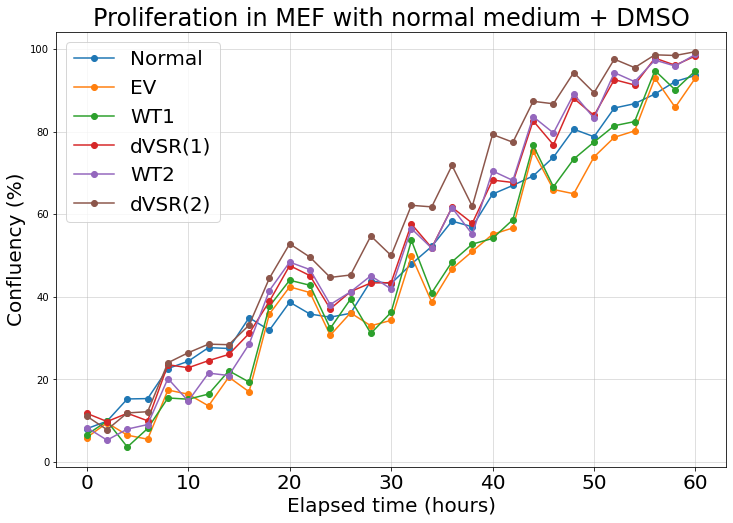

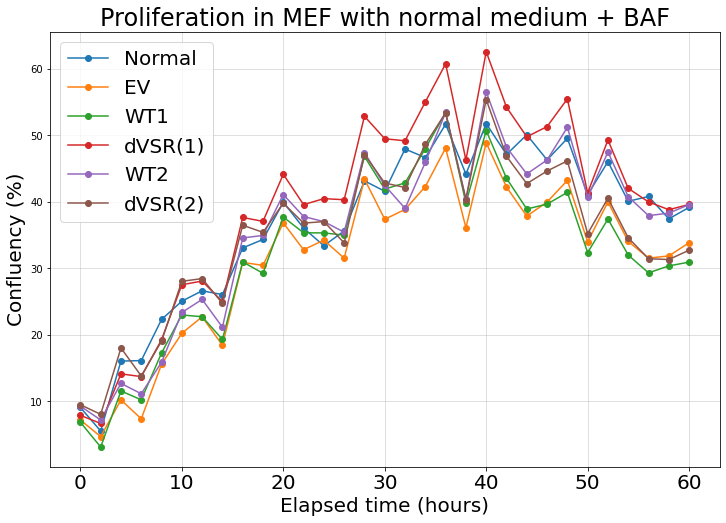

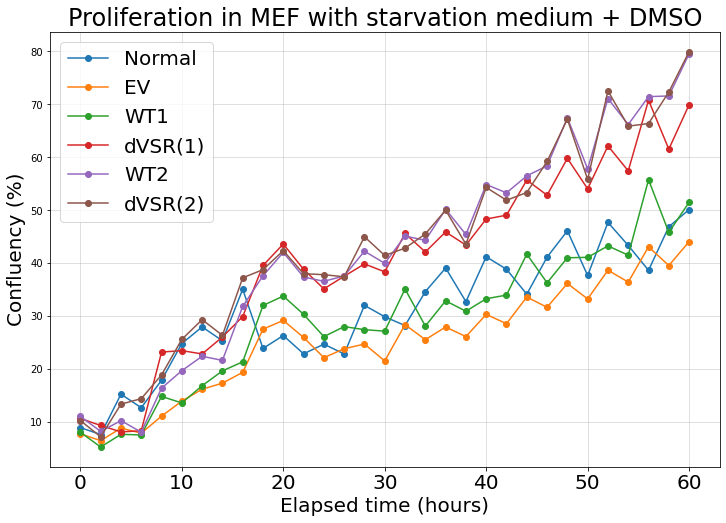

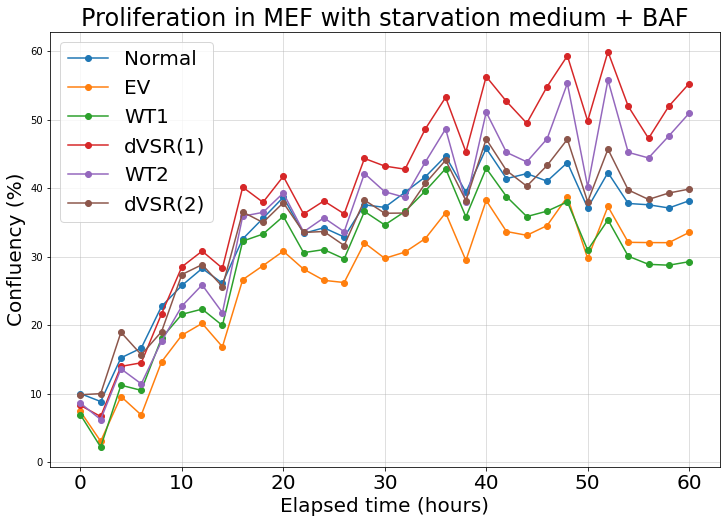

<Figure size 864x576 with 0 Axes>

In [5]:
#Visualization of all data
all_data = [[prolif_rich_DMSO, ' with normal medium + DMSO'],
            [prolif_rich_BAF, ' with normal medium + BAF'],
            [prolif_starv_DMSO, ' with starvation medium + DMSO'],
            [prolif_starv_BAF, ' with starvation medium + BAF']]
        
for data in all_data:
    col_selection = data[0]
    name = data[1]
    
    for column in col_selection:     
        label_ = column.split(' ')[0]
        #graph
        plt.grid()
        plt.plot(prolif_df['Elapsed'], prolif_df[column], 'o-', label= label_)
        plt.legend()
        plt.title('Proliferation in MEF'+name)
        plt.ylabel('Confluency (%)')
        plt.xlabel('Elapsed time (hours)')
    plt.grid(alpha = 0.5)
    plt.show()
    plt.clf()
    print()

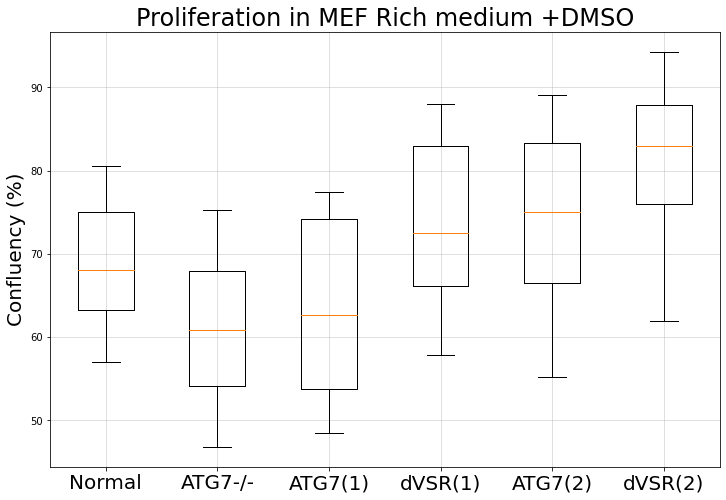

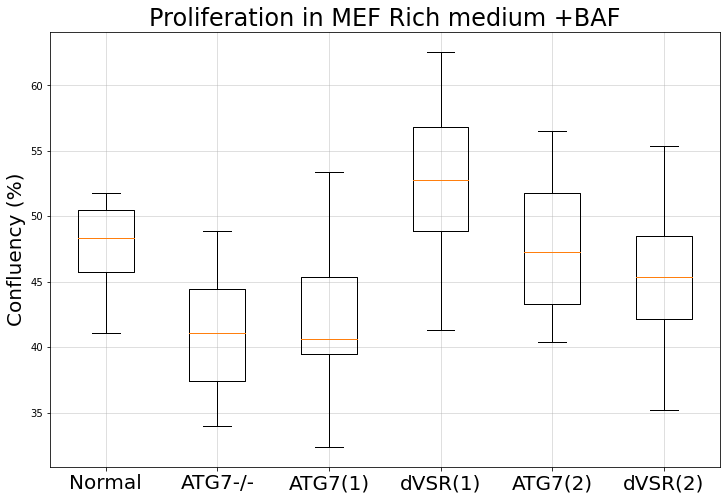

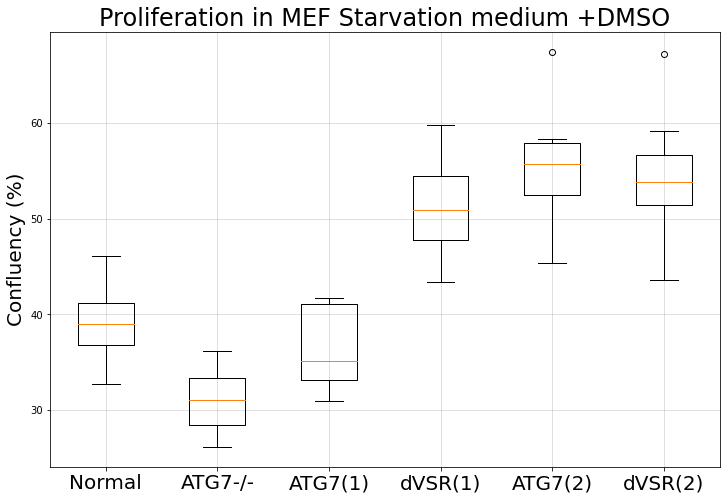

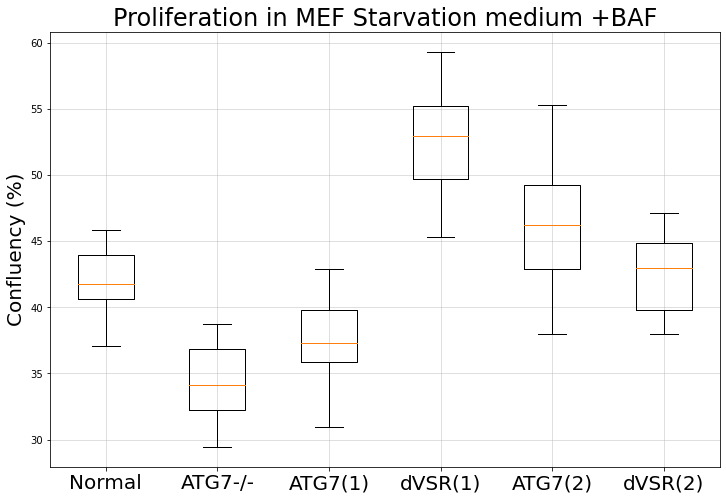

<Figure size 864x576 with 0 Axes>

In [6]:
#Visualization of all data
all_data = [[prolif_rich_DMSO, ' Rich medium +DMSO'],
            [prolif_rich_BAF, ' Rich medium +BAF'],
            [prolif_starv_DMSO, ' Starvation medium +DMSO'],
            [prolif_starv_BAF, ' Starvation medium +BAF']]
       
#select for 35h to 50h
stats_data = prolif_df[prolif_df['Elapsed'].between(35, 50)]

for data in all_data:
    col_selection = data[0]
    name = data[1]
    
    #graph
    plt.grid()
    plt.boxplot(stats_data[col_selection])
    plt.title('Proliferation in MEF'+name)
    plt.xticks([1, 2, 3, 4, 5, 6], ['Normal', 'ATG7-/-', 'ATG7(1)', 'dVSR(1)', 'ATG7(2)', 'dVSR(2)'])
    plt.ylabel('Confluency (%)')

    plt.grid(alpha = 0.5)
    plt.show()
    plt.clf()
    print()